# LLM Features Demo

PD-Explain supports integration with LLMs (Large Language Models) to provide additional features and capabilities.\
In this demo, we will explore the LLM features of PD-Explain.

In [1]:
import pandas as pd
import pd_explain

usetex-False


In [2]:
adults = pd.read_csv("../Datasets/adult.csv")
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## LLM Setup

To use LLM features, you need to set up the LLM API key.\
You can also set the LLM provider, model, and provider URL, if you would like to use a different provider or model than our defaults.\
These settings are stored in a .env file, and can be changed at any time - but they will persist across sessions, so you only need to set them up once.\
Note that this .env file is created automatically when you first run the code, and is stored within the pd_explain package directory with keys that start with "DOT_ENV_PD_EXPLAIN_", so it will not interfere with your other environment variables.\
This will always be stored locally, and will not be shared with anyone else.

In [ ]:
# Set up the LLM API key.
# Replace this with your own API key.
pd_explain.LlmSetupMethods.write_llm_api_key("YOUR_API_KEY")

### Customizing LLM Settings

You can customize the LLM settings by changing the provider, model, and provider URL.\
By default, we use:
- Provider: google
- Model: gemini-2.5-flash
- Provider URL: https://generativelanguage.googleapis.com/v1beta/openai/

At the time of writing, Google offers a free tier for gemini-2.5-flash, but you will need to set up a Google Cloud account and create an API key to use it. See the [Google Gemini documentation](https://ai.google.dev/gemini-api/docs/api-key) for more information on how to set up your API key.\
You should check the [Google Gemini pricing page](https://cloud.google.com/gemini/pricing) for the latest pricing information, as it may change over time.\
Additionaly, you may also want to check [together.ai](https://www.together.ai/), who also offer some powerful models for free, such as `deepseek-ai/DeepSeek-R1-Distill-Llama-70B-free` and `meta-llama/Llama-3.3-70B-Instruct-Turbo-Free`.\

If you set up the provider as either "together", "google" or "openai", we automatically set the provider url to the correct value. Otherwise, you can set it to any url you want.\
You can also set the model to any model you want, as long as it is compatible with the provider you are using.\
Note that all of the calls below are not needed in a normal session, as the defaults are already set.

In [ ]:
# Set up the LLM provider
pd_explain.LlmSetupMethods.write_llm_provider("google")

In [ ]:
# Set up the LLM model
pd_explain.LlmSetupMethods.write_llm_model("gemini-2.5-flash")

In [ ]:
# Set up the LLM provider URL
pd_explain.LlmSetupMethods.write_provider_url("https://generativelanguage.googleapis.com/v1beta/openai/")

## Adding Reasoning to Explanations

PD-Explain will provide you with statistical and logical explanations for your operations.\
By setting the `add_llm_explanation_reasoning` parameter to True, you can receive additional explanations, utilizing a LLM's domain knowledge and reasoning capabilities, to enhance your understanding of the results.\
Do note - this may take a while to run, as it is entirely dependent on the LLM provider and model you are using.\
Also always remember to take LLM results with a grain of salt, as they are not always correct.\
Also note that the results you get will depend on the model you are using. From our experience, weaker models may often give non-sensical results, while stronger models will give you more meaningful results.\
We recommend using either `deepseek-ai/DeepSeek-R1-Distill-Llama-70B-free` or `meta-llama/Llama-3.3-70B-Instruct-Turbo-Free` for the best results among free models.

### Example 1: Reasoning for a Filter Operation's Explanation

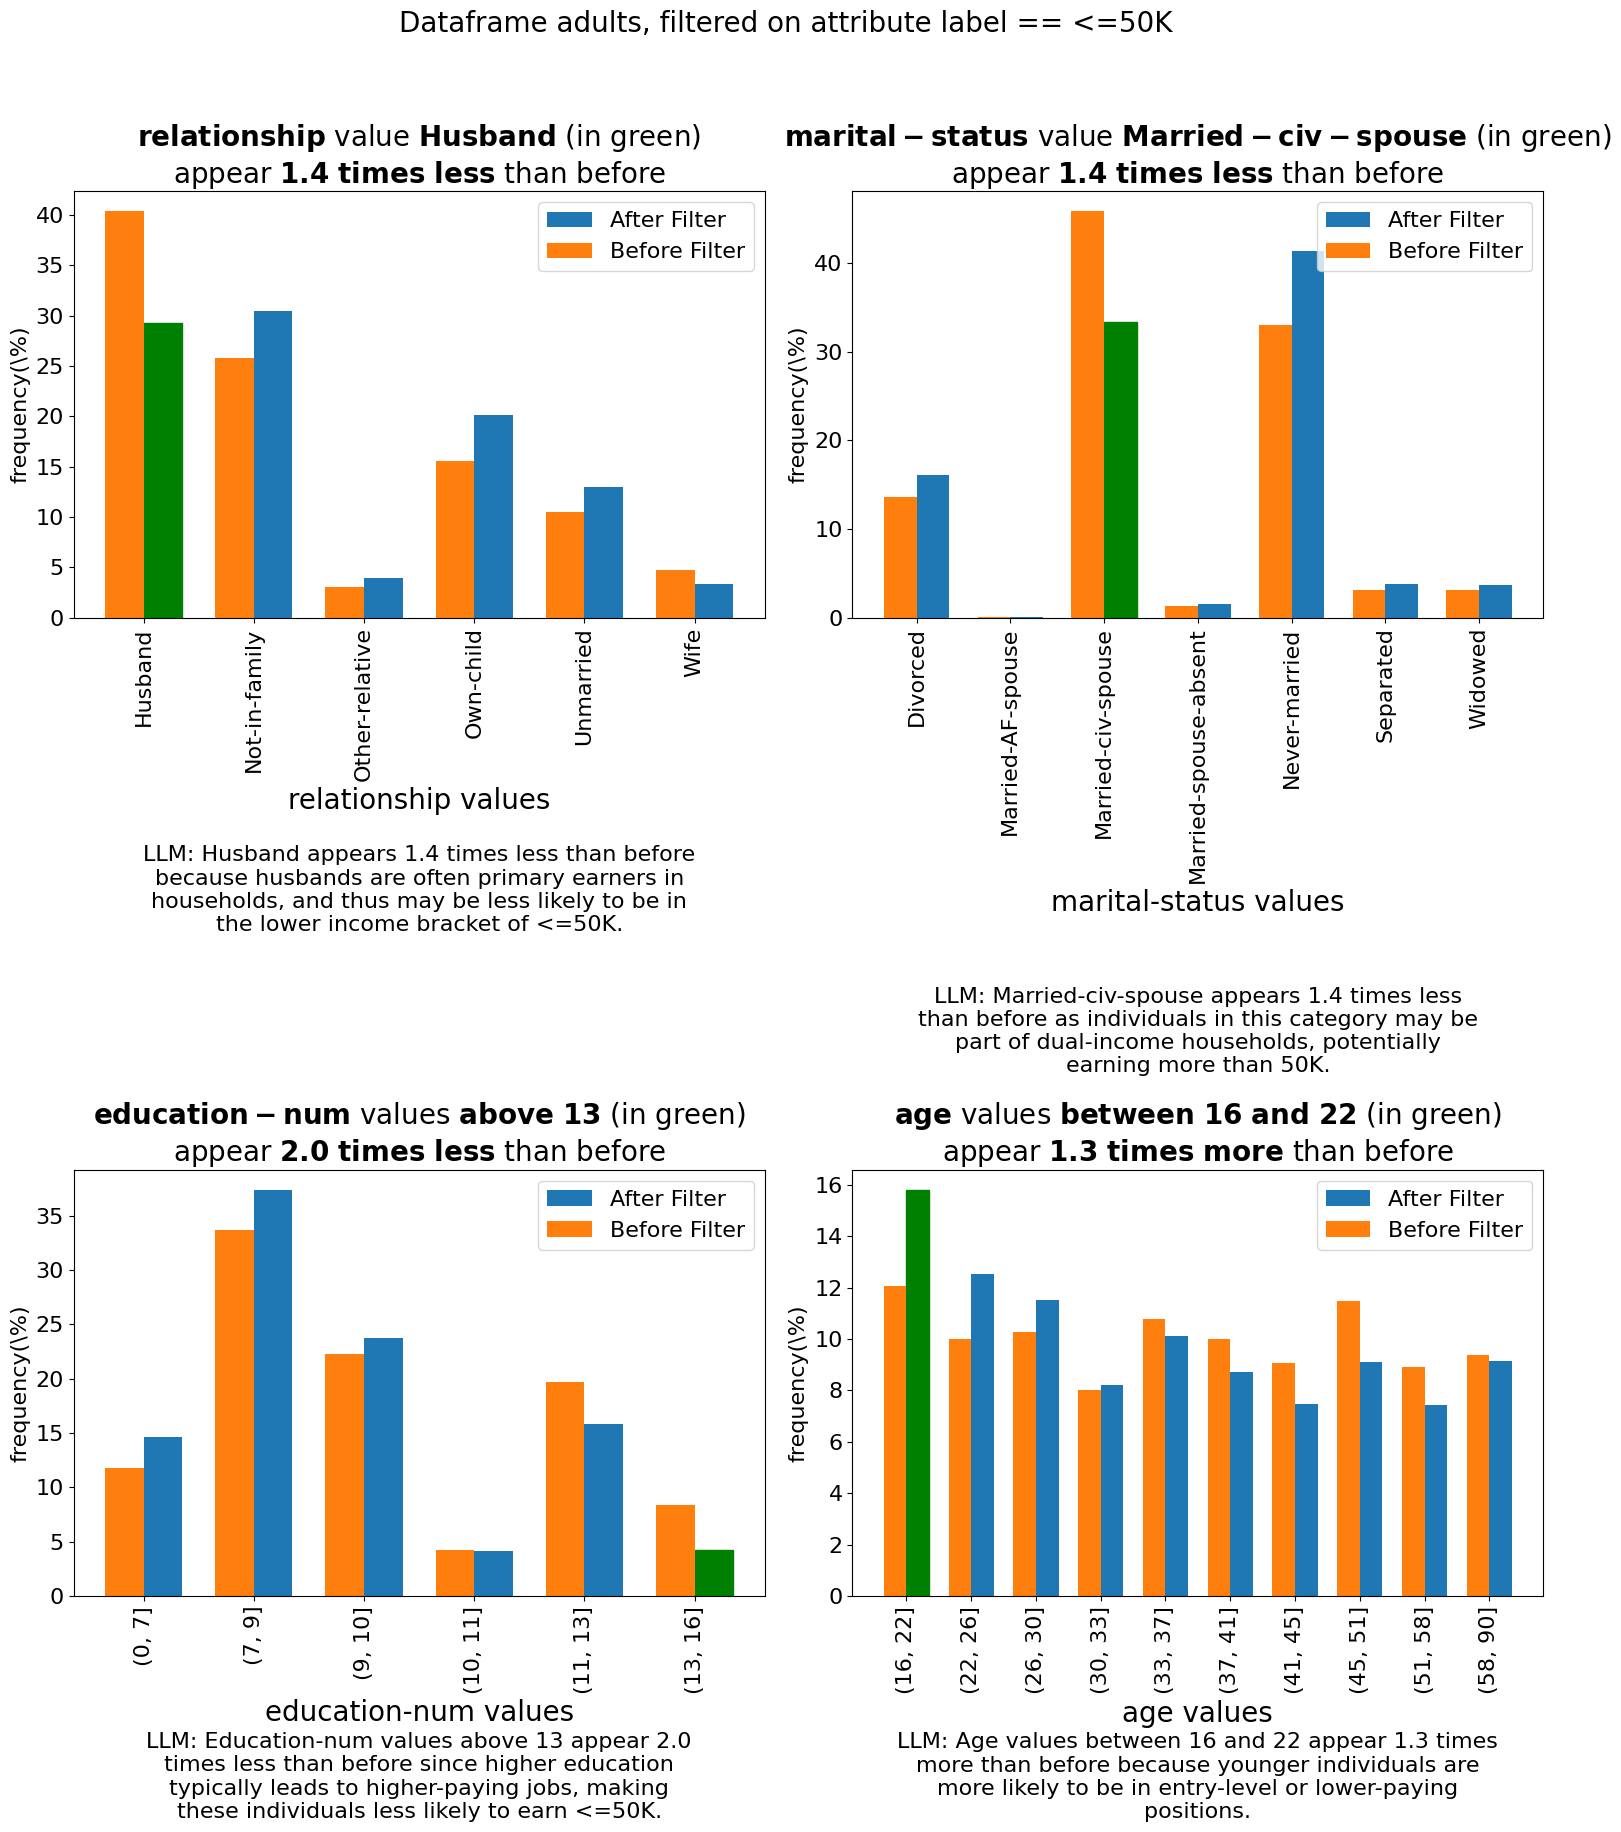

In [3]:
low_income = adults[adults['label'] == '<=50K']
low_income.explain(top_k=4, add_llm_explanation_reasoning=True)

### Example 2: Reasoning for a GroupBy Operation's Explanation

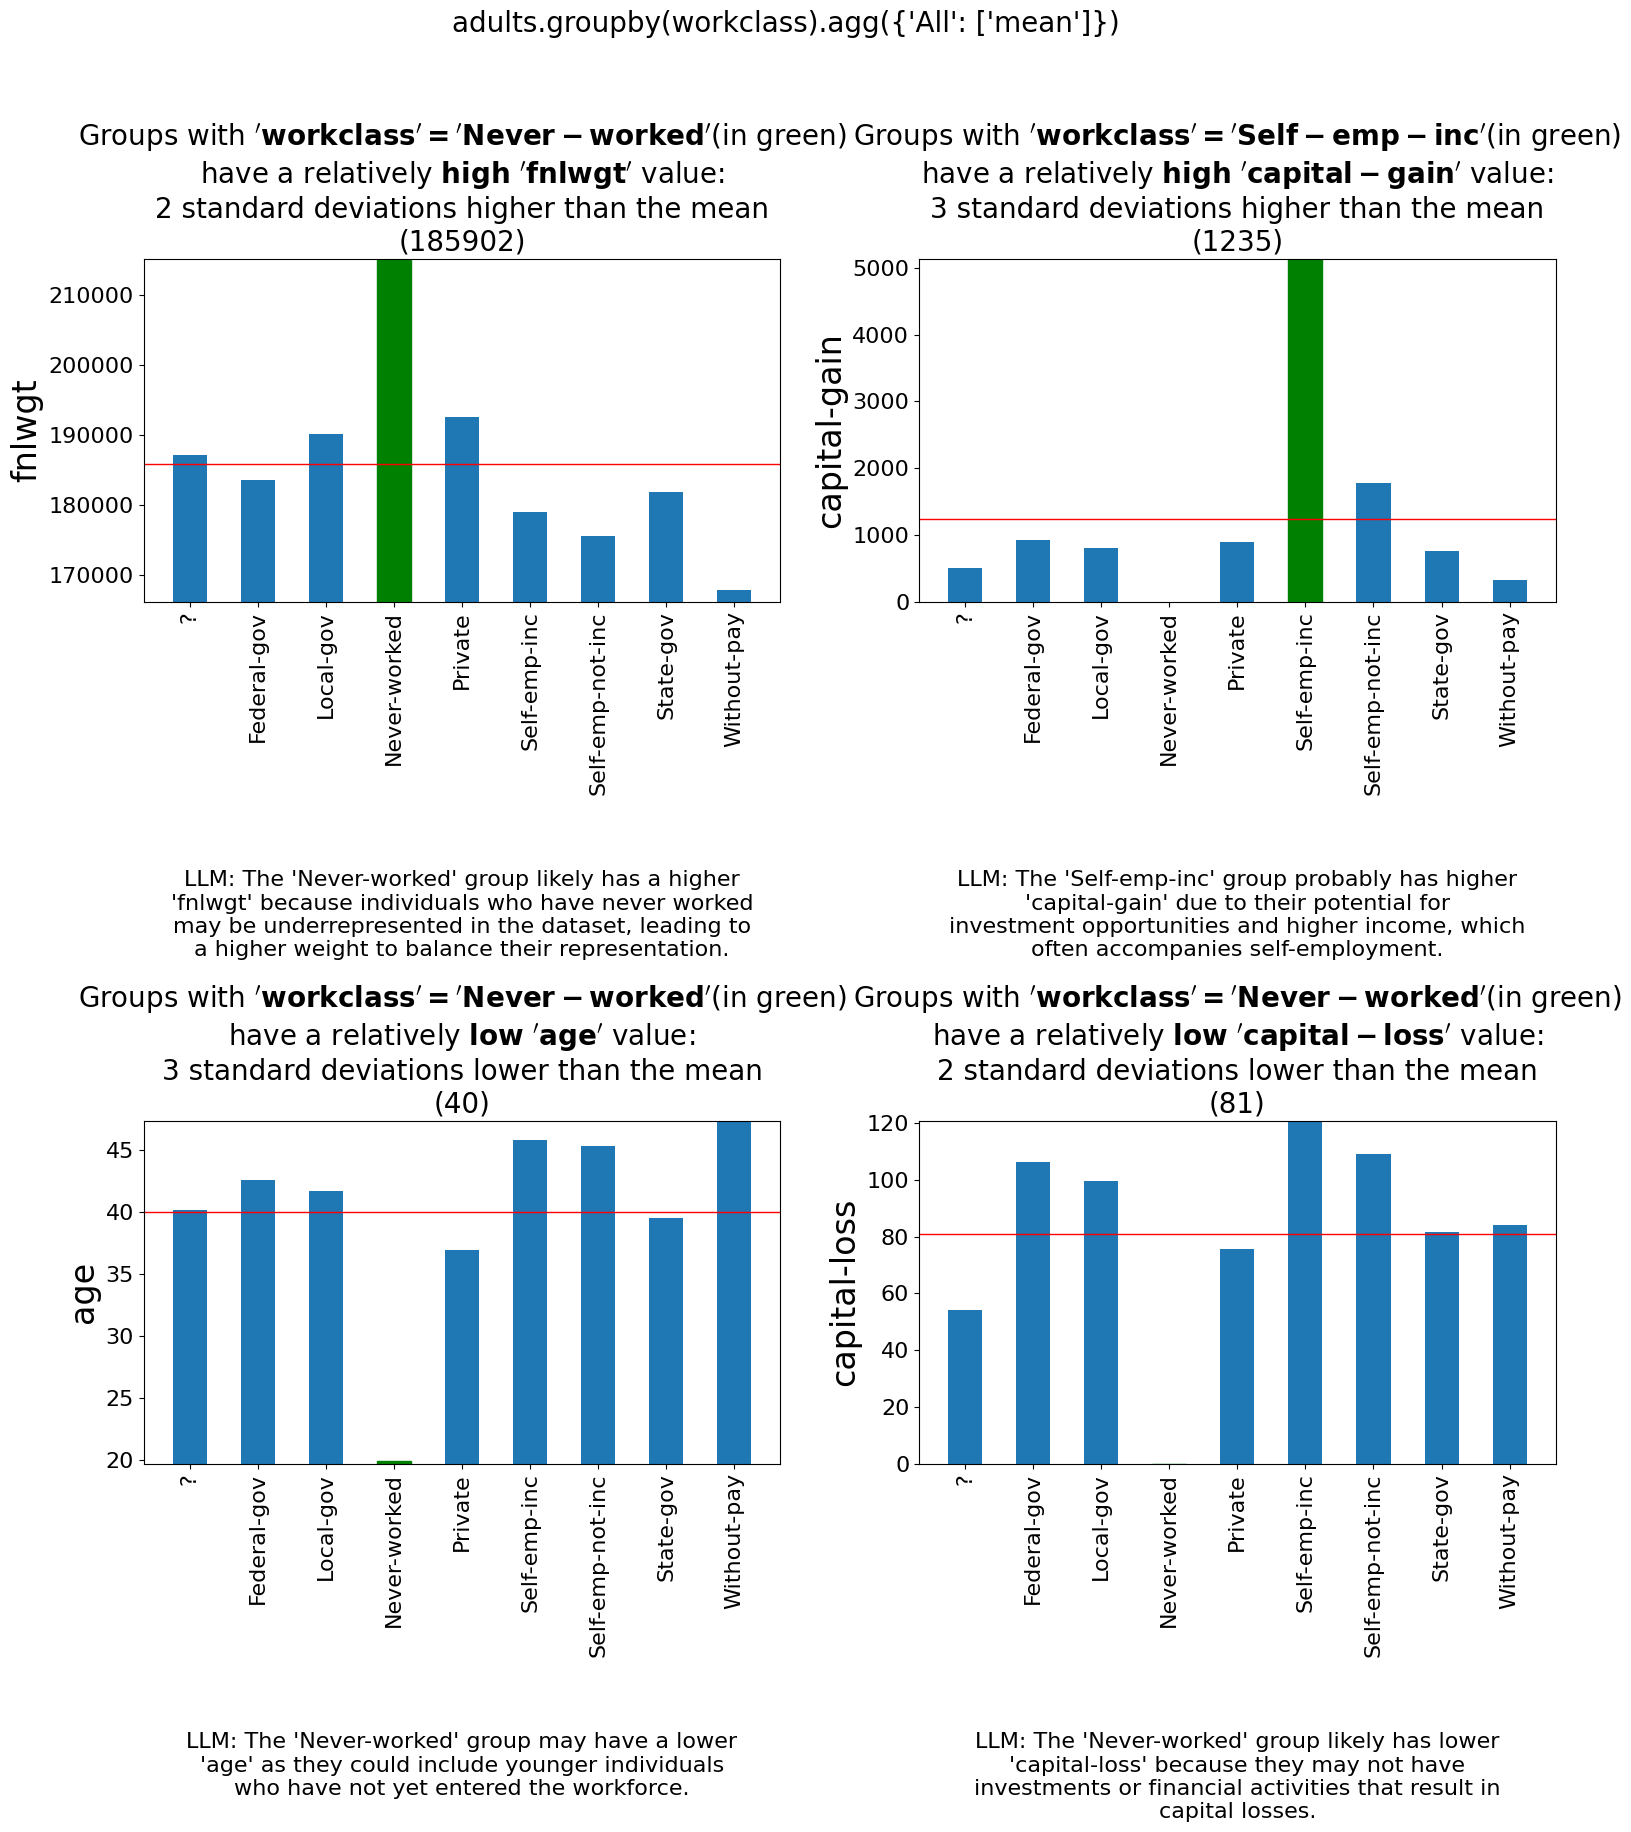

In [4]:
by_workclass = adults.groupby('workclass').mean()
by_workclass.explain(top_k=4, add_llm_explanation_reasoning=True)

### Example 3: Reasoning for Many-to-One Explanations

In [5]:
adults.explain(explainer='many_to_one', labels='label', add_llm_explanation_reasoning=True)

Coverage  \
Group / Cluster Explanation                                                   
<=50K           0 <= capital-gain <= 4243.5                            0.99   
                0 <= capital-gain <= 5095.5 AND 1 <= education-...     0.75   
                0 <= capital-gain <= 5095.5                             1.0   
                1 <= education-num <= 10                               0.75   
>50K            No explanation found                                    NaN   

                                                                   Separation Error  \
Group / Cluster Explanation                                                           
<=50K           0 <= capital-gain <= 4243.5                                     0.2   
                0 <= capital-gain <= 5095.5 AND 1 <= education-...             0.13   
                0 <= capital-gain <= 5095.5                                    0.21   
                1 <= education-num <= 10                                       0.15   
>50K            No explanation found                                            NaN   

                                                                   Separation Error Origins  \
Group / Cluster Explanation                                                                   
<=50K           0 <= capital-gain <= 4243.5                         100.00% from group >50K   
                0 <= capital-gain <= 5095.5 AND 1 <= education-...  100.00% from group >50K   
                0 <= capital-gain <= 5095.5                         100.00% from group >50K   
                1 <= education-num <= 10                            100.00% from group >50K   
>50K            No explanation found                                                    NaN   

                                                                                                      LLM Explanation  
Group / Cluster Explanation                                                                                            
<=50K           0 <= capital-gain <= 4243.5                         LLM: The group earning <=50K is strongly assoc...  
                0 <= capital-gain <= 5095.5 AND 1 <= education-...  LLM: Combining capital gains between 0 and 509...  
                0 <= capital-gain <= 5095.5                         LLM: The capital gains range of 0 to 5095.5 al...  
                1 <= education-num <= 10                            LLM: Education-num between 1 and 10 explains 7...  
>50K            No explanation found                                LLM: No explanation was found for the >50K gro...

### Example 4: Reasoning for Outlier Explanations

In [6]:
spotify = pd.read_csv("../Datasets/spotify_all.csv")

In [7]:
new_songs_df = spotify[spotify['year'] >= 1990]

In [8]:
gb_decade = new_songs_df.groupby('decade')['popularity'].sem()
gb_decade

decade
1990    0.073978
2000    0.179497
2010    0.202626
2020    0.360631
Name: popularity_sem, dtype: float64

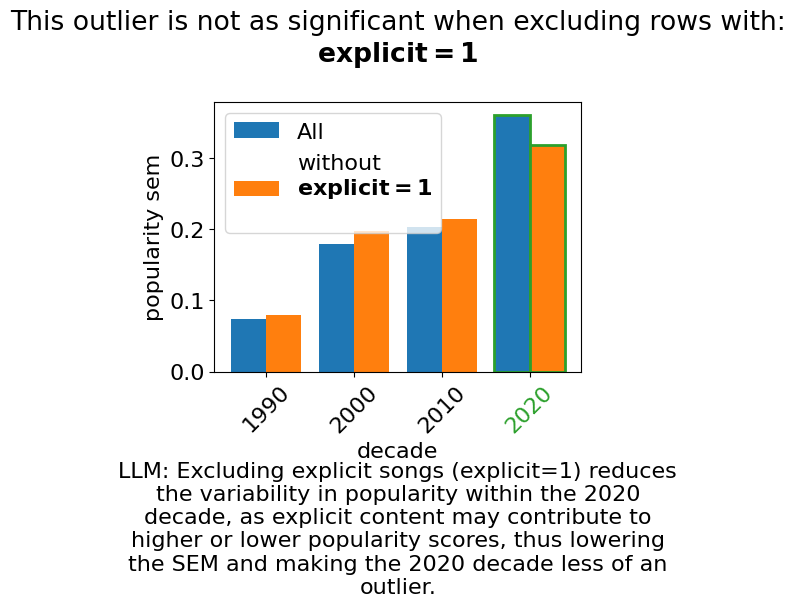

In [9]:
gb_decade.explain(explainer='outlier', target = 2020, dir='high', add_llm_explanation_reasoning=True)

## Automated Data Exploration

Pd-Explain offers the option to use a LLM for conducting automated data exploration.\
\
By providing a query of what the user wishes to explore, we utilize a LLM to generate queries with the goal of discovering information relevant to the user's request.\
Each query is analyzed using our explainers (specifically, the FEDEx and MetaInsight explainers), and fed back to the LLM for an iterative process, where in each iteration the LLM creates more queries to gleam more information relevant to the user's query, constructing a query tree.\
At the end of the process, the user will be provided with a summary of findings, visualizations of the queries deemed most important to producing the conclusions, and the query tree drawn as a graph where the user can view all of the queries as well as visualize the findings of each query (where possible) by clicking on their node.

### Using automated data exploration

The usage of the automatic data exploration is simple.\
However, note that it may take a while to run (possibly several minutes).\
Once done, you will see a widget with several tabs open.

In [ ]:
adults.automatic_data_exploration(user_query="Explore the effect that education and occupation have on one's capital-loss and capital-gain")

There are other parameters that can be controlled:

- `num_iterations`: Number of iterations to run the deep dive analysis. Default is 10. Note that each iteration will call the LLM once.
- `queries_per_iteration`: Number of queries to generate per iteration. Default is 5. This number is not set in stone, and may go up during the process if the LLM's queries fail too often.
- `fedex_top_k`: Number of top findings to return from the FEDEx explainer. Default is 3.
- `metainsight_top_k`: Number of top findings to return from the MetaInsight explainer. Default is 2.
- `metainsight_max_filter_cols`: Maximum number of columns to analyze distribution of in the MetaInsight explainer. Default is 3.
- `metainsight_max_agg_cols`: Maximum number of columns to aggregate by in the MetaInsight explainer. Default is 3.
- `visualization_type`: The type of visualization for the query tree. Can be 'graph' for an interactive graph visualization, or 'simple' for a simpler, static HTML visualization. Default is 'graph'.

#### Saving and re-loading results

It is possible to both save and re-load results after the automated exploration is finished, to avoid re-running the process, taking up time, tokens, and likely giving a not identical result (though typically somewhat similar).

To save the results, use:

In [ ]:
adults.save_data_exploration(file_path="data_exploration_example.dill")

To load and visualize the results again, use (`graph` is the default value of the second argument)

In [ ]:
adults.visualize_from_saved_data_exploration(file_path="data_exploration_example.dill", visualization_type='graph')

### Loading pre-prepared results for this demo

Since the automated data exploration can take a while to run, we have prepared a file with the results of the automated data exploration for this demo.

In [ ]:
# Uncomment the following line if you don't have gdown installed
#!pip install gdown

#### Example 1

In [ ]:
import gdown
url= "https://drive.google.com/uc?export=download&id=1lfctxJqnDwiWYcxdCU6KJHC6T4oA57n6"
output = "data_exploration_example.dill"
gdown.download(url, output, quiet=False)

In [15]:
adults.visualize_from_saved_data_exploration(file_path="data_exploration_example.dill", visualization_type='graph')

#### Example 2

In [ ]:
import gdown
url= "https://drive.google.com/uc?export=download&id=1RrRzmuTZwpoDExRZX5mfkvz0JwB0cIPO"
output = "data_exploration_example2.dill"
gdown.download(url, output, quiet=False)

In [ ]:
adults.visualize_from_saved_data_exploration(file_path="data_exploration_example2.dill", visualization_type='graph')

### Automated follow up on explainer results using automated data exploration

You can use the automated data exploration feature to follow up on the results you got from the explainer, particularly so if you added LLM reasoning to it.\
The follow up feature will automatically pass your selected explanations and format a query for you, instructing the LLM to attempt to draw more information regarding the explanation(s), add context to them, and potentially corroborate any added reasoning by a LLM.

In [ ]:
# For this example, we are using the explanations for low_income from the first section.
# The index passed is the index of the explanation, in this case, the top left plot.
low_income.follow_up_with_automated_data_exploration(explanation_index=0)

#### Pre-prepared results for this demo

There are two pre-prepared results for this demo - once without LLM reasoning, and once with LLM reasoning.\
First, we will load the results without LLM reasoning:

In [ ]:
# Uncomment the following line if you don't have gdown installed
#!pip install gdown

In [ ]:
import gdown
url= "https://drive.google.com/uc?export=download&id=1uuDn0vvLUYSjgFLk1kmVc3vJyIajcjws"
output = "follow_up_example.dill"
gdown.download(url, output, quiet=False)

In [17]:
adults.visualize_from_saved_data_exploration(file_path="follow_up_example.dill", visualization_type='graph')

And next, the results with LLM reasoning:

In [ ]:
import gdown
url= "https://drive.google.com/uc?export=download&id=1kC5A-bJkB4Q5FUar3sjOSAl0xp-tgDi_"
output = "follow_up_example_with_llm.dill"
gdown.download(url, output, quiet=False)

In [19]:
adults.visualize_from_saved_data_exploration(file_path="follow_up_example_with_llm.dill", visualization_type='graph')